In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [60]:
df=pd.read_csv('/content/Patient Severity Score for Electronic Health Records.csv')

In [61]:
df

,TEMPF,PULSE,RESPR,BPSYS,BPDIAS,POPCT,SCORE
0,99.1,90,16,129,75,99,0
1,97.5,71,16,167,82,98,0
2,98.4,89,20,118,76,98,0
3,97.6,85,16,124,95,98,0
4,98.2,80,18,156,92,98,0
...,...,...,...,...,...,...,...
79535,98.2,96,15,147,81,98,1
79536,98.7,83,21,161,87,96,2
79537,97.5,125,26,86,45,81,3
79538,98.0,128,16,127,96,99,2


In [62]:
df.describe()

,TEMPF,PULSE,RESPR,BPSYS,BPDIAS,POPCT,SCORE
count,79540.000000,79540.000000,79540.000000,79540.000000,79540.000000,79540.000000,79540.000000
mean,98.072934,86.288257,18.646568,135.939955,79.046015,97.741463,0.921297
std,1.010266,17.373582,3.873378,23.452158,14.572607,2.809677,1.060885
min,89.500000,7.000000,8.000000,54.000000,21.000000,23.000000,0.000000
25%,97.600000,74.000000,16.000000,120.000000,70.000000,97.000000,0.000000
50%,98.000000,85.000000,18.000000,134.000000,79.000000,98.000000,1.000000
75%,98.500000,97.000000,20.000000,148.000000,88.000000,99.000000,2.000000
max,105.400000,200.000000,90.000000,280.000000,177.000000,100.000000,3.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79540 entries, 0 to 79539
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEMPF   79540 non-null  float64
 1   PULSE   79540 non-null  int64  
 2   RESPR   79540 non-null  int64  
 3   BPSYS   79540 non-null  int64  
 4   BPDIAS  79540 non-null  int64  
 5   POPCT   79540 non-null  int64  
 6   SCORE   79540 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 4.2 MB


In [64]:
df['SCORE']=df['SCORE ']
df=df.drop(columns='SCORE ')

In [65]:
hassan=df['SCORE'].value_counts()
hassan

0    37412
1    21700
3    10724
2     9704
Name: SCORE, dtype: int64

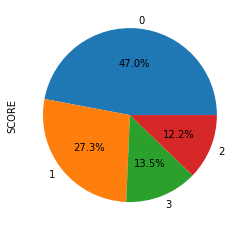

In [66]:
hassan.plot.pie(autopct='%1.1f%%');

In [67]:
hassna=df.corr()

In [68]:
hassna

,TEMPF,PULSE,RESPR,BPSYS,BPDIAS,POPCT,SCORE
TEMPF,1.000000,0.246747,0.039762,-0.022611,-0.011896,-0.049310,0.157599
PULSE,0.246747,1.000000,0.125084,0.001319,0.124204,-0.106369,0.529807
RESPR,0.039762,0.125084,1.000000,0.053454,0.026943,-0.117410,0.392445
BPSYS,-0.022611,0.001319,0.053454,1.000000,0.601627,-0.048045,-0.103474
BPDIAS,-0.011896,0.124204,0.026943,0.601627,1.000000,0.030292,-0.073230
POPCT,-0.049310,-0.106369,-0.117410,-0.048045,0.030292,1.000000,-0.364250
SCORE,0.157599,0.529807,0.392445,-0.103474,-0.073230,-0.364250,1.000000


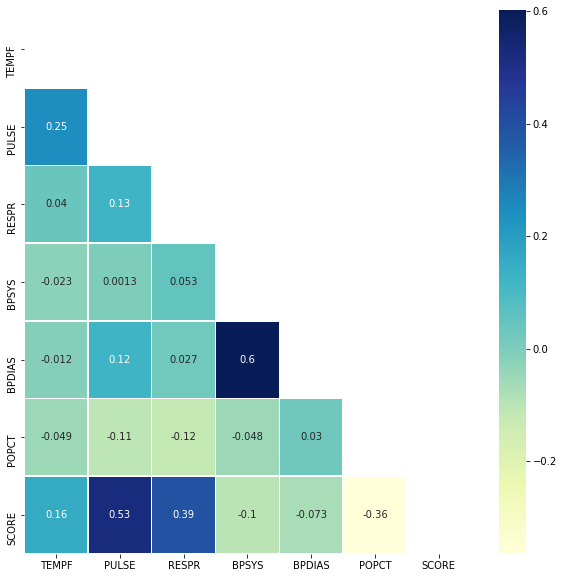

In [69]:
f,ax=plt.subplots(figsize=(10,10))
mask = np.triu(np.ones_like(hassna, dtype=bool))
sns.heatmap(hassna,annot=True,ax=ax,linewidths=.5,cmap="YlGnBu",mask=mask);

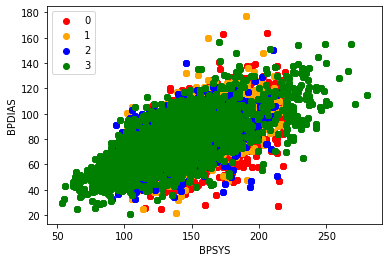

In [70]:
colors = ['red', 'orange', 'blue','green']
for i in range(4):
    x = df[df['SCORE'] == i]
    plt.scatter(x['BPSYS'], x['BPDIAS'],c = colors[i],label=i)
plt.xlabel("BPSYS")
plt.ylabel("BPDIAS")
plt.legend()

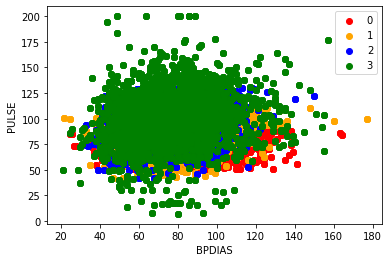

In [71]:
for i in range(4):
    x = df[df['SCORE'] == i]
    plt.scatter(x['BPDIAS'], x['PULSE'],c = colors[i],label=i)
plt.xlabel("BPDIAS")
plt.ylabel("PULSE")
plt.legend()

In [72]:
X=df.iloc[:,:-1]
y=df['SCORE']

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
(scaler.fit_transform(df))

array([[0.60377358, 0.43005181, 0.09756098, ..., 0.34615385, 0.98701299,
        0.        ],
       [0.50314465, 0.33160622, 0.09756098, ..., 0.39102564, 0.97402597,
        0.        ],
       [0.55974843, 0.42487047, 0.14634146, ..., 0.3525641 , 0.97402597,
        0.        ],
       ...,
       [0.50314465, 0.61139896, 0.2195122 , ..., 0.15384615, 0.75324675,
        1.        ],
       [0.53459119, 0.62694301, 0.09756098, ..., 0.48076923, 0.98701299,
        0.66666667],
       [0.54716981, 0.38860104, 0.09756098, ..., 0.49358974, 0.93506494,
        0.33333333]])

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier( n_neighbors = i)
    knn.fit(X_train , y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

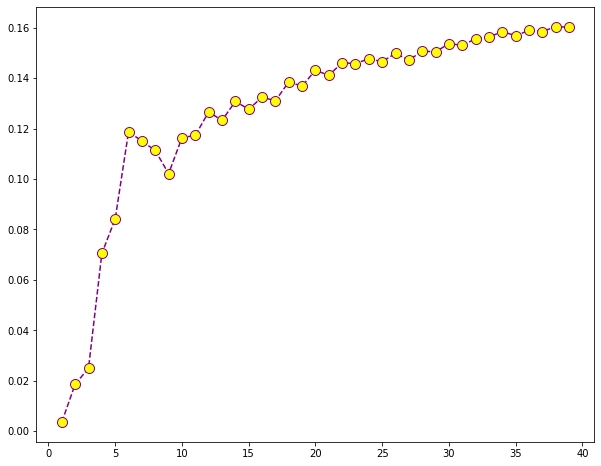

In [77]:
plt.figure( figsize=(10,8))
plt.plot( range(1,40) , error_rate , color='purple', linestyle='--', marker='o',
         markerfacecolor='yellow', markersize=10);

In [78]:
nnn=error_rate.index(min(error_rate))+1
print('the best number of neighbors is:',nnn)

the best number of neighbors is: 1


In [79]:
knn=KNeighborsClassifier(n_neighbors=nnn)
knn.fit(X_train,y_train)
print('knn score is:',knn.score(X_test,y_test)*100,'%')

knn score is: 99.63791802866481 %
